# Multi-Layer Perceptron

The goal of this assignment is to solve multi-class classification problems using the
Multi-Layer Perceptron (MLP) model and learn how to train this model optimally.
- Part A: An extensive study of the MLP model
- Part B: Design an MLP for optimal performance 
- 
### Dataset

MNIST (Modified National Institute of Standards and Technology)
dataset, which is a set of 70,000 small images of digits handwritten by high schoolstudents and employees of the US Census Bureau. Each image is labeled with the digit it represents.


##### Description: 
There are 70,000 images. Each image is grayscale 28 x 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

###### Source:

load this dataset using the Keras API:
https://keras.io/api/datasets/mnist/


##### Input variables:
Small images of digits handwritten by high school
students and employees of the US Census Bureau.

##### Output variable: 
10 classes representing integer values from
0 to 9



In [4]:
# Import python modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf


## Load Data & Scale the Data

In [6]:
# Single line comments on a code block should be added by using the pound/hash sign shown in this comment

mnist = tf.keras.datasets.mnist

# Load the full training & test data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


# Create validation dataset as well as scale (max-min scaling) the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full
X_test = X_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)


No. of Training Samples:  (60000, 28, 28)
No. of Training Labels:  (60000,)

No. of Validation Samples:  (5000, 28, 28)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


## Build the MLP Model

## Experiment 1

In [8]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'zeros'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 78.1 ms
Wall time: 60 ms


## Train the MLP Model

In [9]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3085 - accuracy: 0.1037 - val_loss: 2.3164 - val_accuracy: 0.1100
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1068 - val_loss: 2.3044 - val_accuracy: 0.1126
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1123 - val_loss: 2.2955 - val_accuracy: 0.1372
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 2.2473 - accuracy: 0.1605 - val_loss: 2.1387 - val_accuracy: 0.2426
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 2.0165 - accuracy: 0.2684 - val_loss: 1.9289 - val_accuracy: 0.2890
Epoch 6/50
938/938 [==============================] - 2s 3ms/step - loss: 1.8760 - accuracy: 0.3024 - val_loss: 1.8248 - val_accuracy: 0.3142
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 1.7873 - accuracy: 0.3214 - val_loss: 1.7518 - val_accuracy: 0.3262
Epoch 

## Evaluate the Model

In [10]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [1.5292425155639648, 0.3986000120639801]
1875/1875 [==============================] - 3s 1ms/step

Train Accuracy:  0.40523333333333333

Test Accuracy:  0.3986

Test Confusion Matrix:
[[ 751    0   13    4    1   28  182    0    1    0]
 [   0 1031    2    4    6    2    2   73    2   13]
 [  76    5  103  253   97  162  252   23   43   18]
 [  16   11  141  362  141  110   93   46   60   30]
 [   4   44   16  113  297   15   17  249   59  168]
 [  30    2  149  225   32  190  222    7   28    7]
 [ 397    1   29   46    8   95  375    2    3    2]
 [   0  181    5   29   94    7    4  586   17  105]
 [  21   11   84  325  151   81  126   42   85   48]
 [   3   89    5   40  173    3   12  458   20  206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       980
           1       0.75      0.91      0.82      1135
           2       0.19      0.10      0.13      1032
  

## Plot Learning Curves

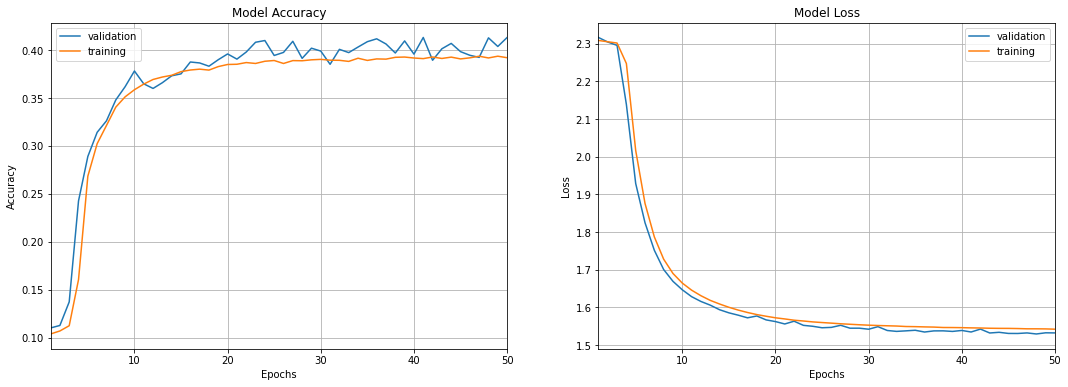

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 2 

## Buid the MLP model for experiment 2

In [13]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'ones'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 62.5 ms
Wall time: 64.2 ms


## Train the MLP model

In [19]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 100
size_of_mini_batch = 32


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4746 - accuracy: 0.1013 - val_loss: 2.5158 - val_accuracy: 0.0924
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4741 - accuracy: 0.0989 - val_loss: 2.4192 - val_accuracy: 0.1126
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4699 - accuracy: 0.1017 - val_loss: 2.3799 - val_accuracy: 0.0986
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4820 - accuracy: 0.1009 - val_loss: 2.4610 - val_accuracy: 0.0986
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4740 - accuracy: 0.1011 - val_loss: 2.5900 - val_accuracy: 0.1126
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4758 - accuracy: 0.1003 - val_loss: 2.7405 - val_accuracy: 0.1070
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4703 - accuracy: 0.1021 - val_loss: 2.4558 - val_ac

## Evaluate the model

In [20]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  22

Test Data: Loss & Accuracy:  [2.3802132606506348, 0.10279999673366547]
1875/1875 [==============================] - 3s 2ms/step

Train Accuracy:  0.10441666666666667

Test Accuracy:  0.1028

Test Confusion Matrix:
[[   0    0    0    0    0    0    0  980    0    0]
 [   0    0    0    0    0    0    0 1135    0    0]
 [   0    0    0    0    0    0    0 1032    0    0]
 [   0    0    0    0    0    0    0 1010    0    0]
 [   0    0    0    0    0    0    0  982    0    0]
 [   0    0    0    0    0    0    0  892    0    0]
 [   0    0    0    0    0    0    0  958    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0 1009    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
 

C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plotting Learning Curves

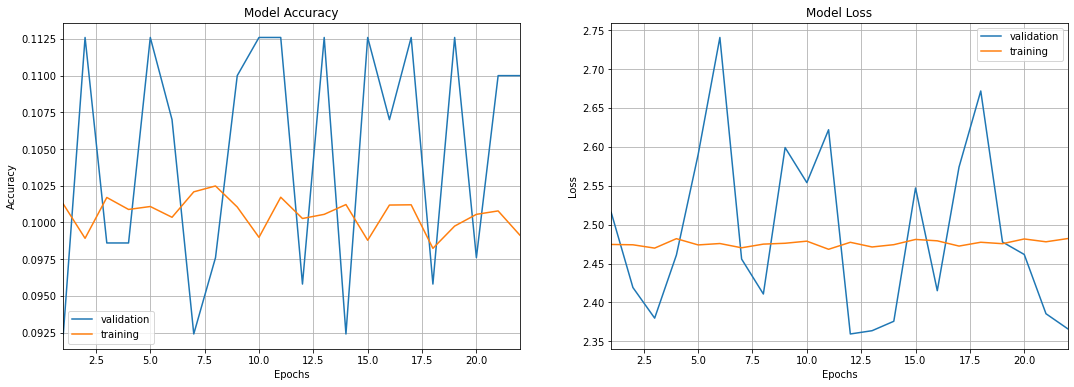

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 3
## Build the MLP Model

In [22]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 109 ms
Wall time: 93.7 ms


## Train the MLP Model

In [23]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 1.6756 - accuracy: 0.4590 - val_loss: 0.7899 - val_accuracy: 0.7706
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5616 - accuracy: 0.8424 - val_loss: 0.4220 - val_accuracy: 0.8860
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3953 - accuracy: 0.8882 - val_loss: 0.3452 - val_accuracy: 0.9044
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3444 - accuracy: 0.9006 - val_loss: 0.3129 - val_accuracy: 0.9114
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3151 - accuracy: 0.9092 - val_loss: 0.2844 - val_accuracy: 0.9198
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2937 - accuracy: 0.9146 - val_loss: 0.2648 - val_accuracy: 0.9218
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2747 - accuracy: 0.9201 - val_loss: 0.2487 - val_accuracy: 0.9316
Epoch 

## Evaluate the Model

In [24]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.0785718485713005, 0.9750999808311462]
1875/1875 [==============================] - 3s 2ms/step

Train Accuracy:  0.9872

Test Accuracy:  0.9751

Test Confusion Matrix:
[[ 966    0    1    1    1    1    6    1    2    1]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   2    1 1014    1    2    0    2    6    4    0]
 [   1    1    4  988    0    5    0    5    4    2]
 [   1    0    5    1  962    0    3    3    1    6]
 [   6    1    0   11    2  859    7    1    4    1]
 [   5    3    2    0    4    2  940    0    2    0]
 [   2   12   11    2    3    0    0  992    3    3]
 [   2    1    3    4    3    3    4    4  948    2]
 [   4    4    0   10   19    5    1    6    4  956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3   

## Plot Learning Curves

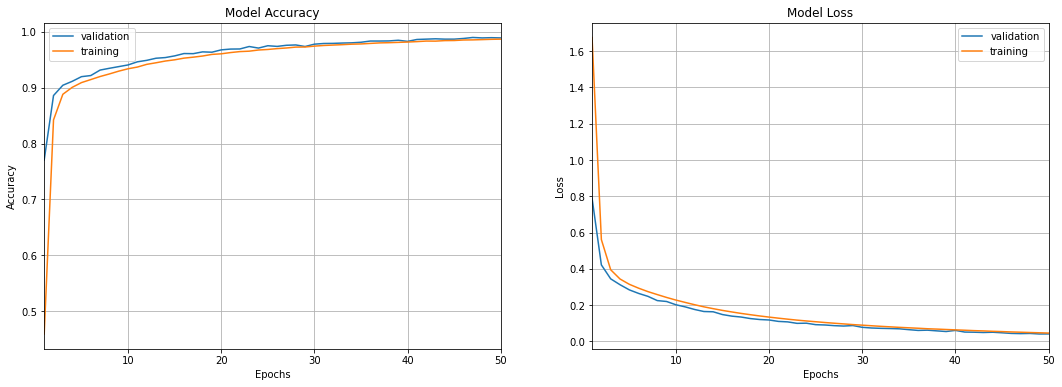

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 4

## Buid the MLP model for experiment 4

In [88]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'tanh'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 78.1 ms
Wall time: 66.8 ms


## Train the MLP model

In [89]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4079 - accuracy: 0.8868 - val_loss: 0.2384 - val_accuracy: 0.9300
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2126 - accuracy: 0.9378 - val_loss: 0.1642 - val_accuracy: 0.9544
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1565 - accuracy: 0.9542 - val_loss: 0.1196 - val_accuracy: 0.9682
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1245 - accuracy: 0.9640 - val_loss: 0.0977 - val_accuracy: 0.9720
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1023 - accuracy: 0.9701 - val_loss: 0.0810 - val_accuracy: 0.9760
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 0.0653 - val_accuracy: 0.9820
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 

## Evaluate the Model

In [90]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.07195618003606796, 0.9812999963760376]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  1.0

Test Accuracy:  0.9813

Test Confusion Matrix:
[[ 972    1    1    0    1    0    1    1    2    1]
 [   1 1126    1    2    0    1    2    1    1    0]
 [   3    2 1011    6    2    0    0    3    5    0]
 [   1    0    2  992    0    2    0    1    8    4]
 [   1    0    0    1  966    0    5    2    0    7]
 [   4    1    0    7    1  869    3    1    4    2]
 [   4    2    1    1    2    4  941    0    3    0]
 [   2    2    7    3    1    0    0 1003    6    4]
 [   3    0    2    3    3    3    3    3  951    3]
 [   0    2    0    4    8    3    2    4    4  982]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3     

## Plot Learning Curves

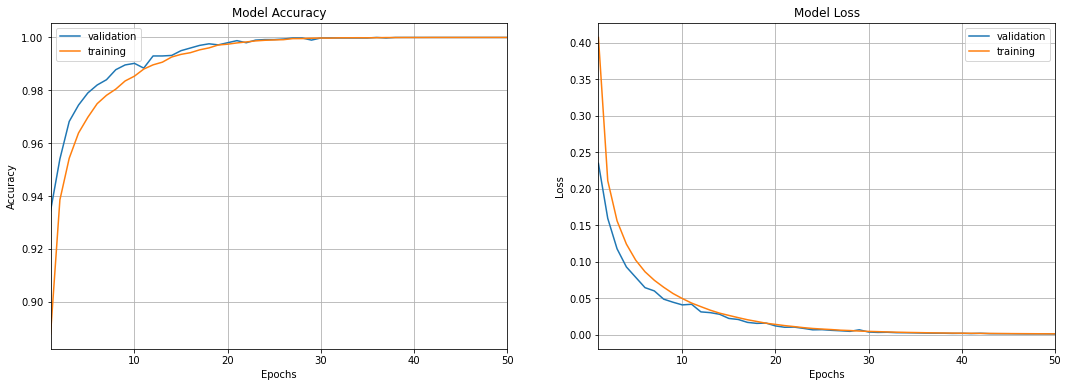

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 5
## Build the MLP Model

In [91]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 78.1 ms
Wall time: 84.8 ms


## Train the MLP Model

In [92]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.4250 - accuracy: 0.8768 - val_loss: 0.1908 - val_accuracy: 0.9438
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1650 - accuracy: 0.9514 - val_loss: 0.1164 - val_accuracy: 0.9672
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1120 - accuracy: 0.9669 - val_loss: 0.0780 - val_accuracy: 0.9776
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.0591 - val_accuracy: 0.9846
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0658 - accuracy: 0.9808 - val_loss: 0.0494 - val_accuracy: 0.9856
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.0394 - val_accuracy: 0.9886
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0439 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9898
Epoch 

## Evaluate the Model

In [93]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.07451998442411423, 0.983299970626831]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  1.0

Test Accuracy:  0.9833

Test Confusion Matrix:
[[ 971    0    1    0    2    1    1    1    2    1]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   3    2 1012    5    1    0    2    2    5    0]
 [   0    0    2  991    0    4    0    3    4    6]
 [   1    0    3    1  967    0    2    1    1    6]
 [   2    0    0    6    1  876    2    1    3    1]
 [   3    2    2    1    4    2  943    0    1    0]
 [   0    2    6    4    1    0    1 1006    4    4]
 [   4    0    2    2    2    2    2    3  953    4]
 [   1    2    0    1    8    3    1    2    3  988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3      

## Plot Learning Curves

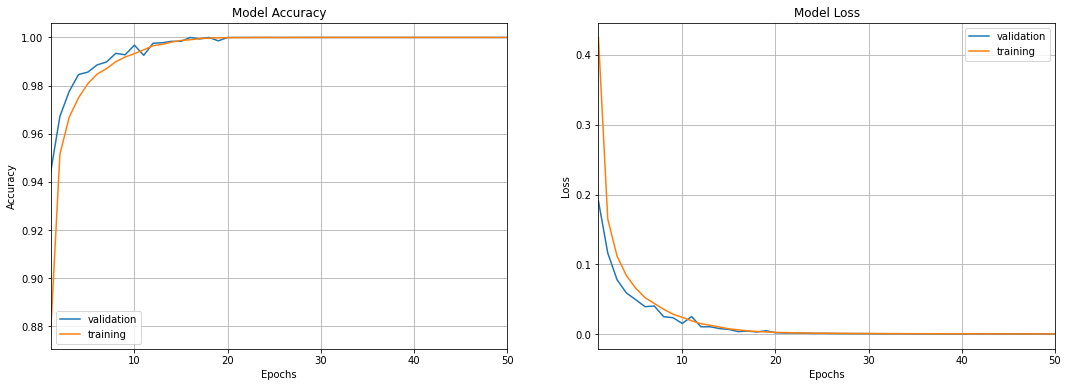

In [94]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 6
## Build the MLP Model

In [96]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Train the MLP Model

In [97]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.4496 - accuracy: 0.8702 - val_loss: 0.1967 - val_accuracy: 0.9444
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1855 - accuracy: 0.9450 - val_loss: 0.1153 - val_accuracy: 0.9696
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1313 - accuracy: 0.9608 - val_loss: 0.0776 - val_accuracy: 0.9774
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1045 - accuracy: 0.9682 - val_loss: 0.0645 - val_accuracy: 0.9816
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0549 - val_accuracy: 0.9836
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0410 - val_accuracy: 0.9884
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0356 - val_accuracy: 0.9914
Epoch 

##  Evaluate the Model

In [98]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.06919267773628235, 0.984000027179718]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  1.0

Test Accuracy:  0.984

Test Confusion Matrix:
[[ 971    1    0    2    0    0    2    1    2    1]
 [   0 1127    2    1    0    0    2    1    2    0]
 [   6    1 1010    3    3    0    1    5    3    0]
 [   0    0    3  997    0    2    0    2    3    3]
 [   0    0    3    1  963    0    2    1    0   12]
 [   3    0    0    7    1  875    2    0    3    1]
 [   2    2    0    1    3    5  945    0    0    0]
 [   1    3    4    3    1    1    0 1006    2    7]
 [   2    1    2    2    1    1    2    3  957    3]
 [   2    2    0    3    6    0    2    3    2  989]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       

## Plot Learning Curves

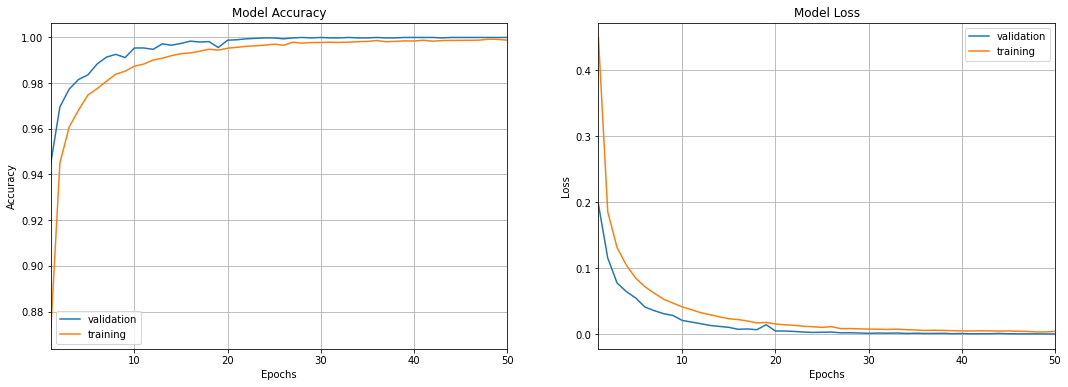

In [99]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 7
## Build the MLP Model

In [100]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Train the MLP Model

In [101]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5430 - accuracy: 0.8321 - val_loss: 0.1989 - val_accuracy: 0.9418
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 0.2455 - accuracy: 0.9258 - val_loss: 0.1265 - val_accuracy: 0.9630
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1862 - accuracy: 0.9437 - val_loss: 0.0923 - val_accuracy: 0.9720
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1590 - accuracy: 0.9532 - val_loss: 0.0840 - val_accuracy: 0.9756
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1406 - accuracy: 0.9578 - val_loss: 0.0660 - val_accuracy: 0.9810
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1225 - accuracy: 0.9627 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1162 - accuracy: 0.9648 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 

## Evaluate the Model

In [102]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.06571047753095627, 0.9833999872207642]
1875/1875 [==============================] - 5s 3ms/step

Train Accuracy:  0.9989833333333333

Test Accuracy:  0.9834

Test Confusion Matrix:
[[ 973    1    1    0    0    1    2    1    1    0]
 [   0 1128    2    1    0    0    1    1    2    0]
 [   0    0 1017    4    1    0    0    8    2    0]
 [   0    0    2  995    0    2    0    7    2    2]
 [   0    0    2    0  965    0    4    2    0    9]
 [   2    0    0    9    1  871    2    1    3    3]
 [   4    3    1    1    3    4  940    0    2    0]
 [   1    3    7    2    0    0    0 1011    0    4]
 [   3    1    1    5    2    2    1    5  950    4]
 [   1    2    0    2   10    1    1    5    3  984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
  

## Plot Learning Curves

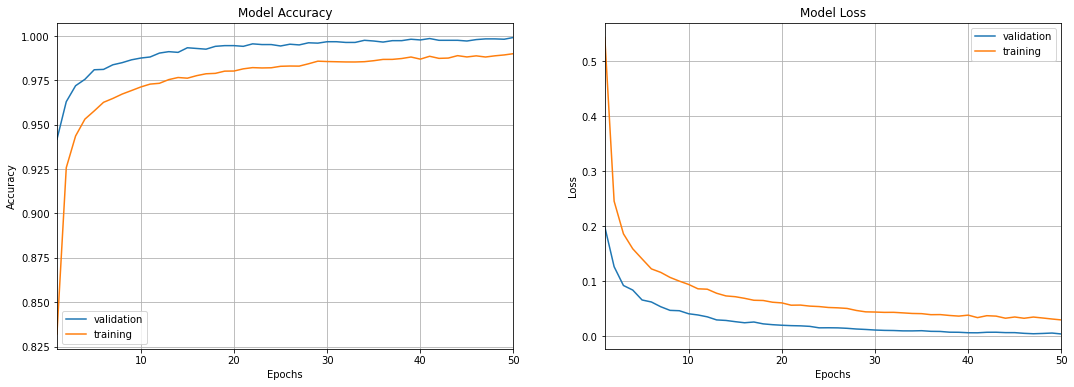

In [103]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 7 with epoch = 150

## Build the model

In [16]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Train the MLP Model

In [17]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 150
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/150
938/938 [==============================] - 3s 3ms/step - loss: 0.5520 - accuracy: 0.8292 - val_loss: 0.1977 - val_accuracy: 0.9404
Epoch 2/150
938/938 [==============================] - 3s 3ms/step - loss: 0.2427 - accuracy: 0.9267 - val_loss: 0.1253 - val_accuracy: 0.9656
Epoch 3/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1842 - accuracy: 0.9447 - val_loss: 0.0922 - val_accuracy: 0.9740
Epoch 4/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1576 - accuracy: 0.9527 - val_loss: 0.0779 - val_accuracy: 0.9782
Epoch 5/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1363 - accuracy: 0.9584 - val_loss: 0.0613 - val_accuracy: 0.9818
Epoch 6/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1253 - accuracy: 0.9617 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 7/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1123 - accuracy: 0.9647 - val_loss: 0.0501 - val_accuracy: 0.9844

Epoch 58/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 59/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 60/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0276 - accuracy: 0.9904 - val_loss: 0.0032 - val_accuracy: 0.9996
Epoch 61/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 62/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 63/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 64/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0.0020 - val_accuracy:

## Evaluate the Model

In [18]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  91

Test Data: Loss & Accuracy:  [0.060750141739845276, 0.984499990940094]
1875/1875 [==============================] - 3s 1ms/step

Train Accuracy:  0.9998166666666667

Test Accuracy:  0.9845

Test Confusion Matrix:
[[ 972    1    1    1    0    1    2    1    1    0]
 [   0 1129    1    0    0    1    2    0    2    0]
 [   3    2 1017    2    1    0    1    5    1    0]
 [   0    0    4  992    0    3    0    5    2    4]
 [   1    0    0    0  966    0    5    2    1    7]
 [   2    1    0    7    1  875    2    0    3    1]
 [   3    2    1    0    2    3  947    0    0    0]
 [   2    3    6    2    0    1    0 1012    0    2]
 [   6    1    1    2    1    3    2    2  954    2]
 [   2    2    0    5    9    0    1    8    1  981]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
  

## Plot Learning Curves

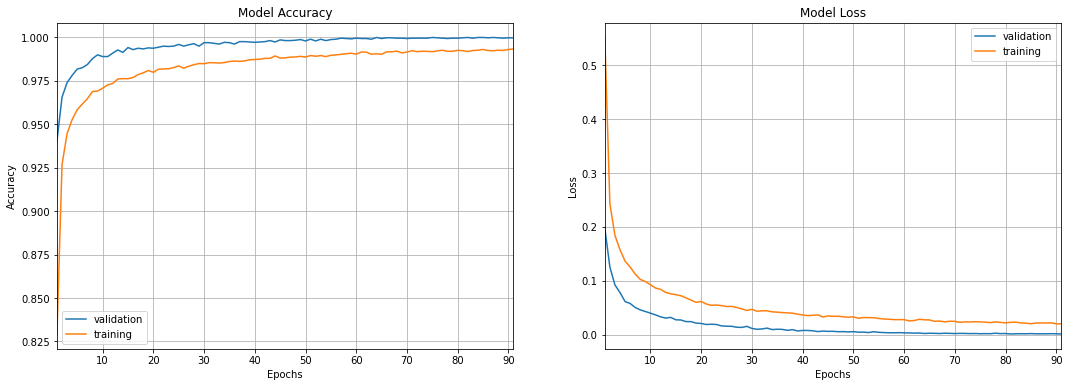

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 8
## Buid the MLP model for experiment 8

In [185]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Train the MLP model

In [186]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3946 - accuracy: 0.8755 - val_loss: 0.1390 - val_accuracy: 0.9602
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 0.2027 - accuracy: 0.9394 - val_loss: 0.1274 - val_accuracy: 0.9608
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1677 - accuracy: 0.9499 - val_loss: 0.0727 - val_accuracy: 0.9802
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1494 - accuracy: 0.9553 - val_loss: 0.0605 - val_accuracy: 0.9842
Epoch 5/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1382 - accuracy: 0.9585 - val_loss: 0.0600 - val_accuracy: 0.9832
Epoch 6/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1246 - accuracy: 0.9612 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1169 - accuracy: 0.9638 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 

## Evaluate the model

In [187]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.07260194420814514, 0.9818000197410583]
1875/1875 [==============================] - 5s 3ms/step

Train Accuracy:  0.9973

Test Accuracy:  0.9818

Test Confusion Matrix:
[[ 972    1    1    0    0    1    2    1    2    0]
 [   0 1128    0    2    0    0    2    0    3    0]
 [   4    0 1008    5    0    0    2    9    4    0]
 [   0    0    3  992    0    5    0    5    2    3]
 [   1    2    1    0  962    0    8    2    1    5]
 [   2    0    0   10    0  868    6    1    4    1]
 [   3    2    0    0    1    3  948    0    1    0]
 [   1    3    4    2    0    0    0 1013    1    4]
 [   3    1    3    7    2    2    2    3  947    4]
 [   2    2    0    6   10    2    2    4    1  980]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3  

## Plotting Learning Curves

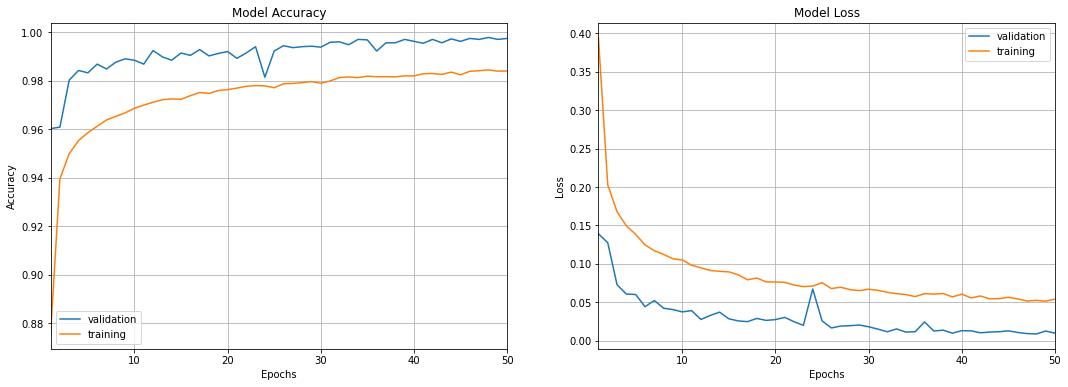

In [188]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 8 with epoch = 150

## Build the MLP model

In [20]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Train the MLP model

In [21]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 150
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/150
938/938 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8787 - val_loss: 0.1358 - val_accuracy: 0.9556
Epoch 2/150
938/938 [==============================] - 3s 3ms/step - loss: 0.2026 - accuracy: 0.9392 - val_loss: 0.1250 - val_accuracy: 0.9634
Epoch 3/150
938/938 [==============================] - 3s 4ms/step - loss: 0.1691 - accuracy: 0.9489 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 4/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1465 - accuracy: 0.9547 - val_loss: 0.0705 - val_accuracy: 0.9784
Epoch 5/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1346 - accuracy: 0.9583 - val_loss: 0.0560 - val_accuracy: 0.9846
Epoch 6/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1225 - accuracy: 0.9626 - val_loss: 0.0483 - val_accuracy: 0.9860
Epoch 7/150
938/938 [==============================] - 3s 3ms/step - loss: 0.1188 - accuracy: 0.9633 - val_loss: 0.0510 - val_accuracy: 0.9856

Epoch 58/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 59/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 60/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0458 - accuracy: 0.9867 - val_loss: 0.0080 - val_accuracy: 0.9982
Epoch 61/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0086 - val_accuracy: 0.9974
Epoch 62/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0073 - val_accuracy: 0.9982
Epoch 63/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0075 - val_accuracy: 0.9978
Epoch 64/150
938/938 [==============================] - 3s 3ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.0061 - val_accuracy:

## Evaluate the model

In [22]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  89

Test Data: Loss & Accuracy:  [0.06670111417770386, 0.9836999773979187]
1875/1875 [==============================] - 3s 2ms/step

Train Accuracy:  0.9991166666666667

Test Accuracy:  0.9837

Test Confusion Matrix:
[[ 974    1    1    0    0    1    0    1    0    2]
 [   0 1131    0    0    0    0    1    0    3    0]
 [   0    0 1019    4    1    1    0    6    1    0]
 [   1    0    1  993    0    6    0    4    2    3]
 [   1    0    2    0  964    0    3    2    1    9]
 [   1    0    0    6    1  879    1    1    2    1]
 [   3    4    1    0    3    4  939    0    3    1]
 [   1    4    5    2    2    0    0 1008    1    5]
 [   4    1    2    5    5    1    1    2  948    5]
 [   2    3    0    0   13    2    0    5    2  982]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
  

## Plotting Learning Curves

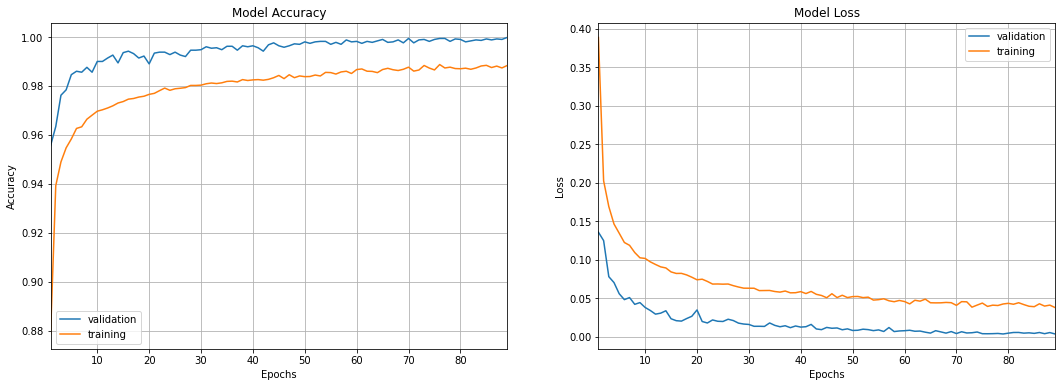

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 9
## Buid the MLP model for experiment 9

In [8]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
 
#forming 10 hidden layers
number_of_layers = 0 
while number_of_layers  != 10 :
    
    model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
    number_of_layers =  number_of_layers + 1

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100) 

## Train the MLP model

In [9]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 4s 3ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3002 - val_accuracy: 0.1126
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 3/50
938/938 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 4/50
938/938 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3003 - val_accuracy: 0.1126
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 6/50
938/938 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/50
938/938 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 

## Evaluate the model

In [10]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  11

Test Data: Loss & Accuracy:  [2.30112886428833, 0.11349999904632568]
1875/1875 [==============================] - 3s 2ms/step

Train Accuracy:  0.11236666666666667

Test Accuracy:  0.1135

Test Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
   

C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plotting Learning Curves

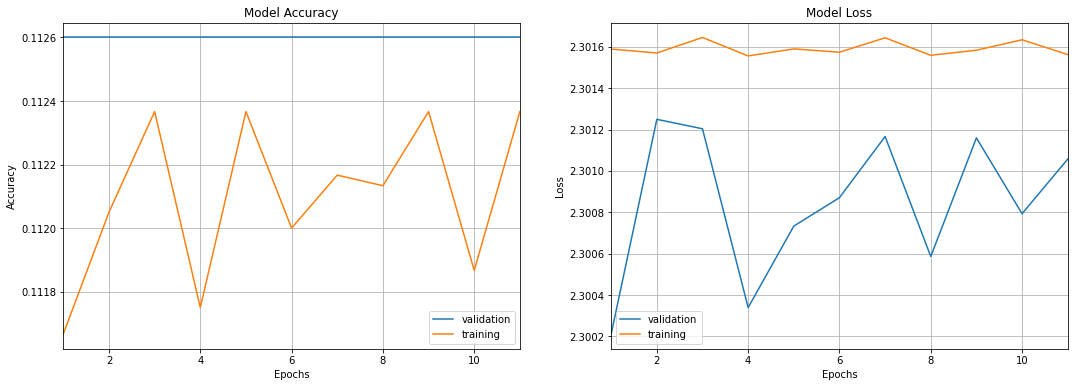

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Experiment 10
## Buid the MLP model for experiment 10

In [4]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
 
#forming 20 hidden layers
number_of_layers = 0 
while number_of_layers  != 20 :
    
    model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
    number_of_layers =  number_of_layers + 1

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100) 

## Train the model

In [5]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3002 - val_accuracy: 0.1126
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3003 - val_accuracy: 0.1126
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1119 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 

## Evaluate the Model

In [6]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  11

Test Data: Loss & Accuracy:  [2.30112886428833, 0.11349999904632568]
1875/1875 [==============================] - 3s 2ms/step

Train Accuracy:  0.11236666666666667

Test Accuracy:  0.1135

Test Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
   

C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plot Learning Curves

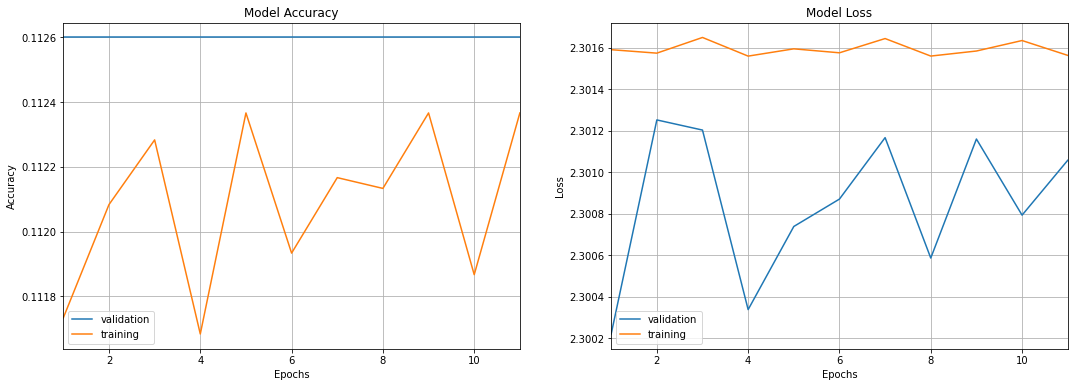

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

# Pat A: Experiment 11

# Trial 1

## Buid the MLP model for experiment 11

In [119]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
 
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros")) 
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300) 

## Train the MLP model

In [120]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 100
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
938/938 [==============================] - 7s 7ms/step - loss: 0.6695 - accuracy: 0.7883 - val_loss: 0.1938 - val_accuracy: 0.9418
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.2005 - accuracy: 0.9393 - val_loss: 0.1159 - val_accuracy: 0.9668
Epoch 3/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1473 - accuracy: 0.9554 - val_loss: 0.0828 - val_accuracy: 0.9758
Epoch 4/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1198 - accuracy: 0.9630 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 5/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1019 - accuracy: 0.9689 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 6/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 7/100
938/938 [==============================] - 6s 7ms/step - loss: 0.0813 - accuracy: 0.9748 - val_loss: 0.0435 - val_accuracy: 0.9870

## Evaluate the model

In [121]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  48

Test Data: Loss & Accuracy:  [0.07629863172769547, 0.98089998960495]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  0.9995333333333334

Test Accuracy:  0.9809

Test Confusion Matrix:
[[ 972    1    0    1    0    1    3    1    1    0]
 [   0 1130    1    0    0    1    1    1    1    0]
 [   2    0 1014    5    2    0    2    5    2    0]
 [   0    0    2  996    0    3    0    1    6    2]
 [   2    1    2    0  964    0    3    1    1    8]
 [   2    0    0    7    0  876    1    2    3    1]
 [   3    2    2    0    2    4  944    0    1    0]
 [   1    5    5    4    0    0    0 1003    4    6]
 [   5    2    2   13    3    5    1    1  938    4]
 [   4    2    0    7   13    4    0    4    3  972]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
    

## Plotting Learning Curves

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Trial 2 : Part A experiment 11

## Buid the MLP model for experiment

In [125]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
 
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros")) 
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300) 

## Train the MLP model

In [126]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 7s 7ms/step - loss: 0.8419 - accuracy: 0.7176 - val_loss: 0.2497 - val_accuracy: 0.9264
Epoch 2/50
938/938 [==============================] - 6s 7ms/step - loss: 0.3416 - accuracy: 0.8970 - val_loss: 0.1766 - val_accuracy: 0.9518
Epoch 3/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2792 - accuracy: 0.9159 - val_loss: 0.1264 - val_accuracy: 0.9632
Epoch 4/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2430 - accuracy: 0.9264 - val_loss: 0.1286 - val_accuracy: 0.9636
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2257 - accuracy: 0.9320 - val_loss: 0.1056 - val_accuracy: 0.9686
Epoch 6/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2089 - accuracy: 0.9375 - val_loss: 0.0981 - val_accuracy: 0.9724
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2009 - accuracy: 0.9384 - val_loss: 0.0908 - val_accuracy: 0.9734
Epoch 

## Evaluate the model

In [127]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.08221829682588577, 0.9757999777793884]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  0.9902

Test Accuracy:  0.9758

Test Confusion Matrix:
[[ 970    0    1    2    0    1    3    1    2    0]
 [   0 1129    0    0    0    0    1    1    4    0]
 [   3    5 1000    4    3    1    3   10    3    0]
 [   0    2    6  981    0    5    0    8    3    5]
 [   1    0    2    0  962    0    4    3    1    9]
 [   2    2    0    5    1  866    8    2    2    4]
 [   6    2    0    0    2    4  943    0    1    0]
 [   2   12    4    3    0    0    0 1001    1    5]
 [   7    4    2    5    6    6    2    4  932    6]
 [   1    4    1    5   11    3    1    7    2  974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3  

## Plotting Learning Curves

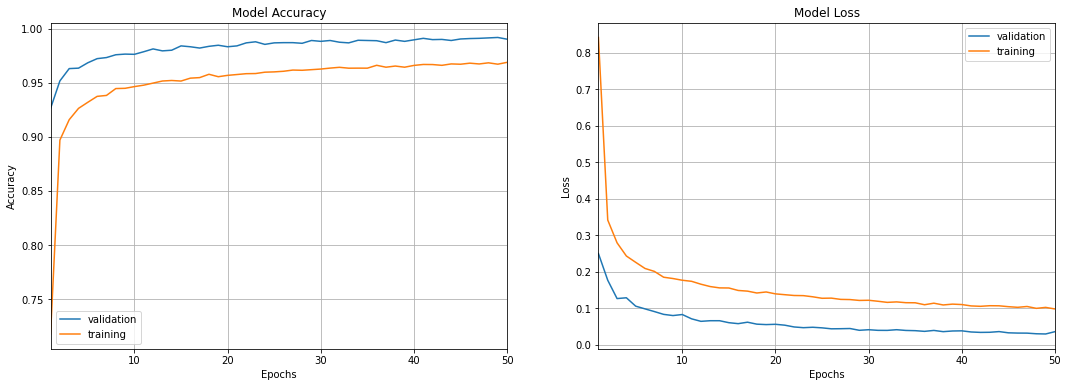

In [128]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

# Trial 3 : Part A experiment 11

## Buid the MLP model

In [135]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
 
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros")) 
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300) 

## Train the MLP model

In [136]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
938/938 [==============================] - 8s 8ms/step - loss: 0.4752 - accuracy: 0.8529 - val_loss: 0.1542 - val_accuracy: 0.9528
Epoch 2/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1725 - accuracy: 0.9511 - val_loss: 0.1307 - val_accuracy: 0.9598
Epoch 3/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1338 - accuracy: 0.9611 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 4/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1137 - accuracy: 0.9666 - val_loss: 0.0598 - val_accuracy: 0.9834
Epoch 5/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0987 - accuracy: 0.9711 - val_loss: 0.0638 - val_accuracy: 0.9790
Epoch 6/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0869 - accuracy: 0.9743 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 7/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 

## Evaluate the model

In [137]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Epochs:  50

Test Data: Loss & Accuracy:  [0.09377193450927734, 0.9794999957084656]
1875/1875 [==============================] - 4s 2ms/step

Train Accuracy:  0.9981666666666666

Test Accuracy:  0.9795

Test Confusion Matrix:
[[ 973    1    0    2    0    1    0    0    2    1]
 [   0 1126    0    2    0    0    1    0    6    0]
 [   3    5 1007    7    1    0    1    5    3    0]
 [   0    1    1  993    0    2    0    3    3    7]
 [   1    2    3    0  957    0    3    4    1   11]
 [   3    0    0   11    0  870    2    0    3    3]
 [   3    2    0    0    2    4  946    0    1    0]
 [   4    7    7    3    0    0    0  996    3    8]
 [   2    2    4    8    3    1    3    4  944    3]
 [   6    3    0    4    8    0    0    3    2  983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
  

## Plotting Learning Curves

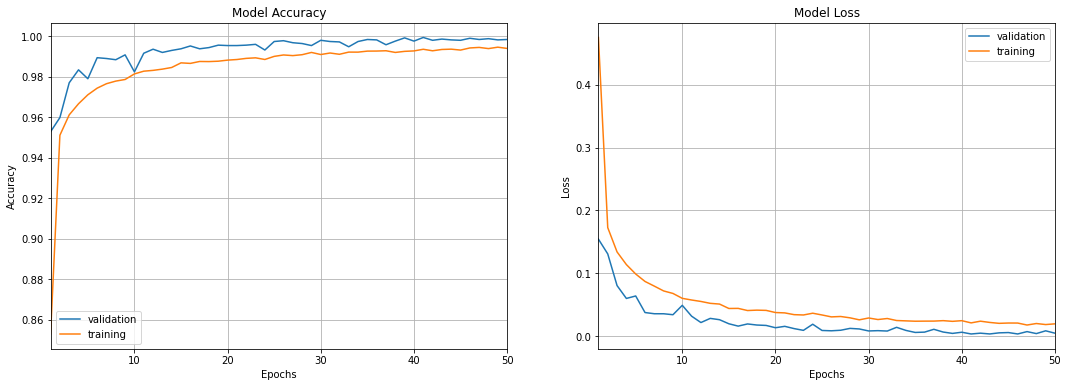

In [138]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

# Part B: Design an MLP for Optimal Performance

## Load Data & Scale the Data

In [9]:
cifar10 = tf.keras.datasets.cifar10

# Load the full training & test data
(X_train_full_c, y_train_full_c), (X_test_c, y_test_c) = cifar10.load_data()

#Convert to 50000 x 3072 size
#X_train_full_c = X_train_full_c.reshape((X_train_full_c.shape[0], 3072))

#Convert to 10000 x 3072 size
#X_test_c = X_test_c.reshape((X_test_c.shape[0], 3072))

#convert to 1D array
y_test_c = y_test_c.ravel()
y_train_full_c =y_train_full_c.ravel()


# Create validation dataset as well as scale (max-min scaling) the data
X_valid_c, X_train_c = X_train_full_c[:5000] / 255.0, X_train_full_c / 255.0
y_valid_c, y_train_c = y_train_full_c[:5000], y_train_full_c
X_test_c = X_test_c / 255.0

print("No. of Training Samples: ", X_train_c.shape)
print("No. of Training Labels: ", y_train_c.shape)

print("\nNo. of Validation Samples: ", X_valid_c.shape)
print("No. of Validation Labels: ", y_valid_c.shape)

print("\nNo. of Testing Samples: ", X_test_c.shape)
print("No. of Testing Labels: ", y_test_c.shape)

print("\nX type: ", X_train_c.dtype)
print("y type: ", y_train_c.dtype)


No. of Training Samples:  (50000, 32, 32, 3)
No. of Training Labels:  (50000,)

No. of Validation Samples:  (5000, 32, 32, 3)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 32, 32, 3)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


# Trial 1

## Build the MLP Model

In [178]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
 
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros")) 
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300) 

## Train the MLP Model

In [179]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 100
size_of_mini_batch = 32


'''
Train the model
'''
history = model.fit(X_train_c, y_train_c, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid_c, y_valid_c),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9166 - accuracy: 0.3025 - val_loss: 1.7698 - val_accuracy: 0.3578
Epoch 2/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7377 - accuracy: 0.3770 - val_loss: 1.6966 - val_accuracy: 0.3920
Epoch 3/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6645 - accuracy: 0.4031 - val_loss: 1.5673 - val_accuracy: 0.4224
Epoch 4/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6088 - accuracy: 0.4217 - val_loss: 1.5550 - val_accuracy: 0.4460
Epoch 5/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5644 - accuracy: 0.4413 - val_loss: 1.4749 - val_accuracy: 0.4630
Epoch 6/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5318 - accuracy: 0.4495 - val_loss: 1.5244 - val_accuracy: 0.4478
Epoch 7/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4983 - accuracy: 0.4631 - val_loss: 1

## Evaluate the Model

In [180]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test_c, y_test_c, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted_c = model.predict(X_test_c)
y_test_predicted_c = np.argmax(y_test_predicted_c, axis=1) # get the label/index of the highest probability class


y_train_predicted_c = model.predict(X_train_c)
y_train_predicted_c = np.argmax(y_train_predicted_c, axis=1) # get the label/index of the highest probability class

train_accuracy_c = np.mean(y_train_predicted_c == y_train_c)
print("\nTrain Accuracy: ", train_accuracy_c)

test_accuracy_c = np.mean(y_test_predicted_c == y_test_c)
print("\nTest Accuracy: ", test_accuracy_c)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_c, y_test_predicted_c))

print("\nClassification Report:")
print(classification_report(y_test_c, y_test_predicted_c))


Epochs:  80

Test Data: Loss & Accuracy:  [1.5209745168685913, 0.5145000219345093]
1563/1563 [==============================] - 8s 5ms/step

Train Accuracy:  0.71822

Test Accuracy:  0.5145

Test Confusion Matrix:
[[672  22  44  55  38  25  17  14  89  24]
 [ 71 578  27  60  23  26  21  14  75 105]
 [ 93  13 410 148 118  96  56  35  16  15]
 [ 28   6  71 453  42 262  71  31  21  15]
 [ 53   6 150 134 428  69  71  58  27   4]
 [ 28   5  73 280  44 459  46  41  19   5]
 [ 13  10  80 186  90  89 506   9   7  10]
 [ 46  11  46 105  85 117  17 527  15  31]
 [137  35  19  60  23  31  15  10 635  35]
 [ 64 138  19 101  19  42  28  38  74 477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1000
           1       0.70      0.58      0.63      1000
           2       0.44      0.41      0.42      1000
           3       0.29      0.45      0.35      1000
           4       0.47      0.43      0.45      1000
      

## Plot Learning Curves

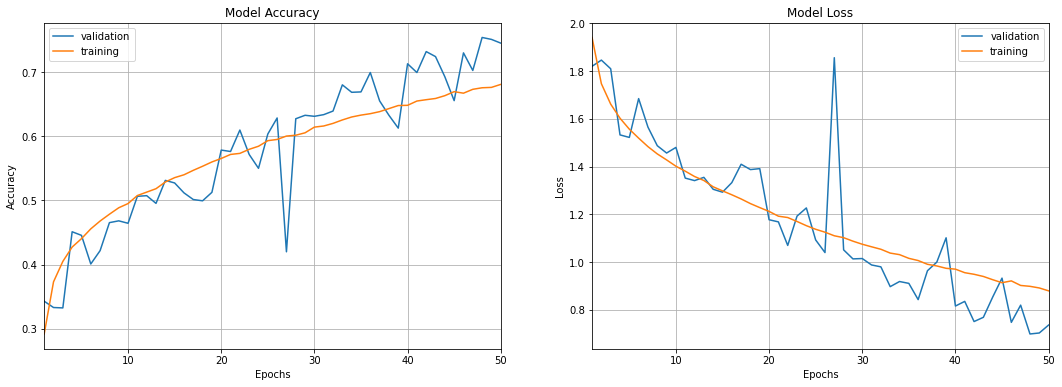

In [159]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Trail 2

## Build the MLP Model

In [181]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
 
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros")) 
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300) 

## Train the MLP Model

In [182]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 100
size_of_mini_batch = 32


'''
Train the model
'''
history = model.fit(X_train_c, y_train_c, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid_c, y_valid_c),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 23s 14ms/step - loss: 2.0051 - accuracy: 0.2650 - val_loss: 1.7831 - val_accuracy: 0.3590
Epoch 2/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7850 - accuracy: 0.3581 - val_loss: 1.6705 - val_accuracy: 0.3974
Epoch 3/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7007 - accuracy: 0.3912 - val_loss: 1.5974 - val_accuracy: 0.4166
Epoch 4/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6421 - accuracy: 0.4119 - val_loss: 1.5710 - val_accuracy: 0.4344
Epoch 5/100
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5946 - accuracy: 0.4297 - val_loss: 1.4838 - val_accuracy: 0.4672
Epoch 6/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5568 - accuracy: 0.4419 - val_loss: 1.5076 - val_accuracy: 0.4456
Epoch 7/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5229 - accuracy: 0.4559 - val_loss: 1

## Evaluate the model

In [183]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test_c, y_test_c, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted_c = model.predict(X_test_c)
y_test_predicted_c = np.argmax(y_test_predicted_c, axis=1) # get the label/index of the highest probability class


y_train_predicted_c = model.predict(X_train_c)
y_train_predicted_c = np.argmax(y_train_predicted_c, axis=1) # get the label/index of the highest probability class

train_accuracy_c = np.mean(y_train_predicted_c == y_train_c)
print("\nTrain Accuracy: ", train_accuracy_c)

test_accuracy_c = np.mean(y_test_predicted_c == y_test_c)
print("\nTest Accuracy: ", test_accuracy_c)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_c, y_test_predicted_c))

print("\nClassification Report:")
print(classification_report(y_test_c, y_test_predicted_c))


Epochs:  100

Test Data: Loss & Accuracy:  [1.5340616703033447, 0.5498999953269958]
1563/1563 [==============================] - 8s 5ms/step

Train Accuracy:  0.86602

Test Accuracy:  0.5499

Test Confusion Matrix:
[[544  34  68  22  47  17  19  26 157  66]
 [ 33 616  18  27   9  11  16  15  57 198]
 [ 64  14 405  97 150  78  87  64  22  19]
 [ 13  11  70 421  88 168 111  64  18  36]
 [ 28   4 119  77 505  54  88  88  22  15]
 [ 11   6  56 282  82 409  57  59  16  22]
 [  4  11  73 104  99  53 610  20  12  14]
 [ 31   7  42  70  86  66  22 619   9  48]
 [ 54  58  24  32  26  11  15  12 693  75]
 [ 26 123  15  31   9  13  14  38  54 677]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1000
           1       0.70      0.62      0.65      1000
           2       0.46      0.41      0.43      1000
           3       0.36      0.42      0.39      1000
           4       0.46      0.51      0.48      1000
     

## Plotting the learning curve

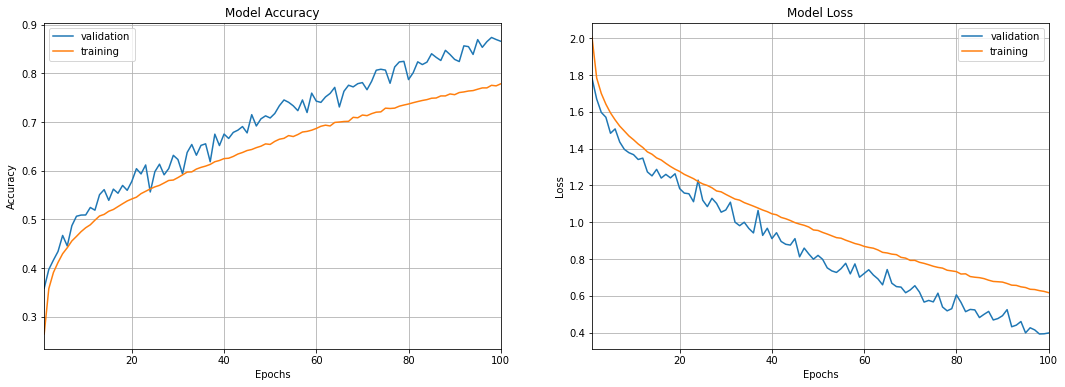

In [184]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

# Trial 3

## Build the MLP Model

In [10]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10

'''
Create the MLP with L2 regularization
'''
model = tf.keras.models.Sequential([    tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
    tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                            activation="softmax")
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 62.5 ms
Wall time: 67.8 ms


## Train the MLP Model

In [11]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 100
size_of_mini_batch = 32


'''
Train the model
'''
history = model.fit(X_train_c, y_train_c, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid_c, y_valid_c),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1945 - accuracy: 0.2965 - val_loss: 2.0239 - val_accuracy: 0.3652
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9931 - accuracy: 0.3765 - val_loss: 1.9158 - val_accuracy: 0.3972
Epoch 3/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9025 - accuracy: 0.4115 - val_loss: 1.8434 - val_accuracy: 0.4230
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8400 - accuracy: 0.4316 - val_loss: 1.8170 - val_accuracy: 0.4382
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7930 - accuracy: 0.4484 - val_loss: 1.7274 - val_accuracy: 0.4658
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7507 - accuracy: 0.4622 - val_loss: 1.8066 - val_accuracy: 0.4198
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7167 - accuracy: 0.4725 - val_loss: 1.6780 

Epoch 57/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0173 - accuracy: 0.7156 - val_loss: 1.0697 - val_accuracy: 0.6874
Epoch 58/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0091 - accuracy: 0.7171 - val_loss: 0.9687 - val_accuracy: 0.7408
Epoch 59/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9959 - accuracy: 0.7255 - val_loss: 1.0013 - val_accuracy: 0.7238
Epoch 60/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9889 - accuracy: 0.7260 - val_loss: 1.0035 - val_accuracy: 0.7262
Epoch 61/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9832 - accuracy: 0.7287 - val_loss: 0.9415 - val_accuracy: 0.7382
Epoch 62/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9761 - accuracy: 0.7302 - val_loss: 0.9392 - val_accuracy: 0.7490
Epoch 63/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9630 - accuracy: 0.7363 - val_loss: 1

## Evaluate the model

In [12]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test_c, y_test_c, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted_c = model.predict(X_test_c)
y_test_predicted_c = np.argmax(y_test_predicted_c, axis=1) # get the label/index of the highest probability class


y_train_predicted_c = model.predict(X_train_c)
y_train_predicted_c = np.argmax(y_train_predicted_c, axis=1) # get the label/index of the highest probability class

train_accuracy_c = np.mean(y_train_predicted_c == y_train_c)
print("\nTrain Accuracy: ", train_accuracy_c)

test_accuracy_c = np.mean(y_test_predicted_c == y_test_c)
print("\nTest Accuracy: ", test_accuracy_c)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_c, y_test_predicted_c))

print("\nClassification Report:")
print(classification_report(y_test_c, y_test_predicted_c))


Epochs:  100

Test Data: Loss & Accuracy:  [2.1613800525665283, 0.5102999806404114]
1563/1563 [==============================] - 3s 2ms/step

Train Accuracy:  0.81348

Test Accuracy:  0.5103

Test Confusion Matrix:
[[516  26  59  24 118  26  16  43 143  29]
 [ 59 529  23  26  44  27  12  51  91 138]
 [ 45  11 280  48 290 152  62  84  21   7]
 [ 18  13  48 240 161 301  83  92  18  26]
 [ 22   3  47  32 637  83  45 105  19   7]
 [  6   4  35 127 155 525  33  90  15  10]
 [  9   9  54  53 230  81 508  28  13  15]
 [ 18  10  21  27 143 105  13 636   9  18]
 [ 88  26  15  23  65  28   7  25 694  29]
 [ 46 115  13  28  42  35  20  81  82 538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      1000
           1       0.71      0.53      0.61      1000
           2       0.47      0.28      0.35      1000
           3       0.38      0.24      0.29      1000
           4       0.34      0.64      0.44      1000
     

## Plotting the learning curve

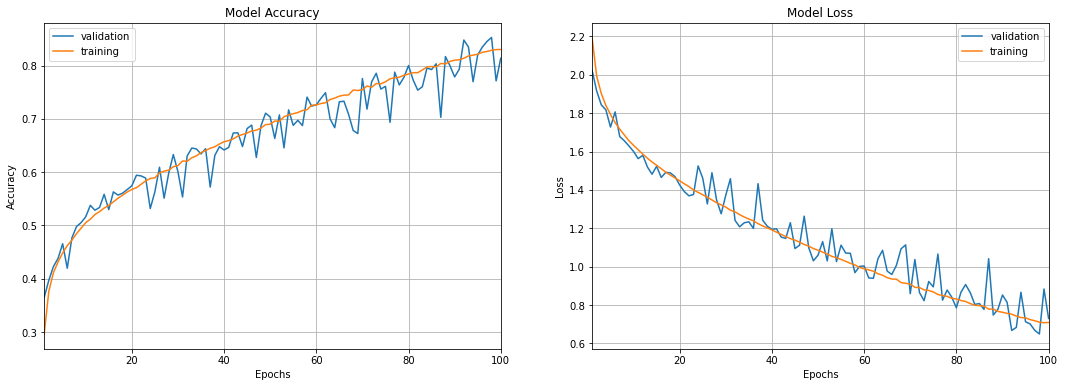

In [13]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

## Trial 4

## Build the model

In [14]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10

'''
Create the MLP with L2 regularization
'''
model = tf.keras.models.Sequential([    tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
    tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001)),

    tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                            activation="softmax")
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1,195,810
Trainable params: 1,195,810
Non-

## Train the model

In [15]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 70
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train_c, y_train_c, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid_c, y_valid_c),
                    callbacks=[early_stopping_cb])

Epoch 1/70
782/782 [==============================] - 7s 9ms/step - loss: 2.2582 - accuracy: 0.2913 - val_loss: 2.1071 - val_accuracy: 0.3338
Epoch 2/70
782/782 [==============================] - 7s 9ms/step - loss: 2.0363 - accuracy: 0.3772 - val_loss: 2.0227 - val_accuracy: 0.3766
Epoch 3/70
782/782 [==============================] - 6s 8ms/step - loss: 1.9408 - accuracy: 0.4143 - val_loss: 1.8912 - val_accuracy: 0.4098
Epoch 4/70
782/782 [==============================] - 7s 9ms/step - loss: 1.8747 - accuracy: 0.4383 - val_loss: 1.8991 - val_accuracy: 0.4278
Epoch 5/70
782/782 [==============================] - 7s 9ms/step - loss: 1.8218 - accuracy: 0.4559 - val_loss: 1.7770 - val_accuracy: 0.4700
Epoch 6/70
782/782 [==============================] - 7s 9ms/step - loss: 1.7778 - accuracy: 0.4701 - val_loss: 1.9976 - val_accuracy: 0.3798
Epoch 7/70
782/782 [==============================] - 7s 9ms/step - loss: 1.7385 - accuracy: 0.4823 - val_loss: 1.7891 - val_accuracy: 0.4566
Epoch 

782/782 [==============================] - 6s 8ms/step - loss: 0.7656 - accuracy: 0.8309 - val_loss: 0.9474 - val_accuracy: 0.7758
Epoch 59/70
782/782 [==============================] - 6s 8ms/step - loss: 0.7445 - accuracy: 0.8405 - val_loss: 1.4976 - val_accuracy: 0.6660
Epoch 60/70
782/782 [==============================] - 7s 10ms/step - loss: 0.7366 - accuracy: 0.8413 - val_loss: 0.8005 - val_accuracy: 0.8204
Epoch 61/70
782/782 [==============================] - 7s 9ms/step - loss: 0.7277 - accuracy: 0.8451 - val_loss: 0.7973 - val_accuracy: 0.8160
Epoch 62/70
782/782 [==============================] - 7s 9ms/step - loss: 0.7183 - accuracy: 0.8492 - val_loss: 0.7902 - val_accuracy: 0.8132
Epoch 63/70
782/782 [==============================] - 7s 8ms/step - loss: 0.7043 - accuracy: 0.8543 - val_loss: 0.9923 - val_accuracy: 0.7580
Epoch 64/70
782/782 [==============================] - 7s 9ms/step - loss: 0.6851 - accuracy: 0.8613 - val_loss: 1.1916 - val_accuracy: 0.7048
Epoch 65/7

## Evaluate the model

In [16]:
%%time

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test_c, y_test_c, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted_c = model.predict(X_test_c)
y_test_predicted_c = np.argmax(y_test_predicted_c, axis=1) # get the label/index of the highest probability class


y_train_predicted_c = model.predict(X_train_c)
y_train_predicted_c = np.argmax(y_train_predicted_c, axis=1) # get the label/index of the highest probability class

train_accuracy_c = np.mean(y_train_predicted_c == y_train_c)
print("\nTrain Accuracy: ", train_accuracy_c)

test_accuracy_c = np.mean(y_test_predicted_c == y_test_c)
print("\nTest Accuracy: ", test_accuracy_c)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_c, y_test_predicted_c))

print("\nClassification Report:")
print(classification_report(y_test_c, y_test_predicted_c))


Epochs:  70

Test Data: Loss & Accuracy:  [4.596059799194336, 0.39399999380111694]
1563/1563 [==============================] - 4s 3ms/step

Train Accuracy:  0.55732

Test Accuracy:  0.394

Test Confusion Matrix:
[[666 225   6   8   6  19   7  16  46   1]
 [ 33 931   2   4   1   9   0   6  13   1]
 [237 157 146  58  67 150  35 126  23   1]
 [ 88 252  11 172  17 314  41  74  30   1]
 [174 160  51  44 247 127  35 133  28   1]
 [ 76 156  18  91  21 481  18 116  22   1]
 [ 95 199  20  52  71 124 347  75  17   0]
 [ 86 213   8  32  23  92  11 517  16   2]
 [154 390   2   5   6  19   2  11 410   1]
 [ 47 844   2   7   1  25   3  23  25  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50      1000
           1       0.26      0.93      0.41      1000
           2       0.55      0.15      0.23      1000
           3       0.36      0.17      0.23      1000
           4       0.54      0.25      0.34      1000
       

## Plotting the learning curve

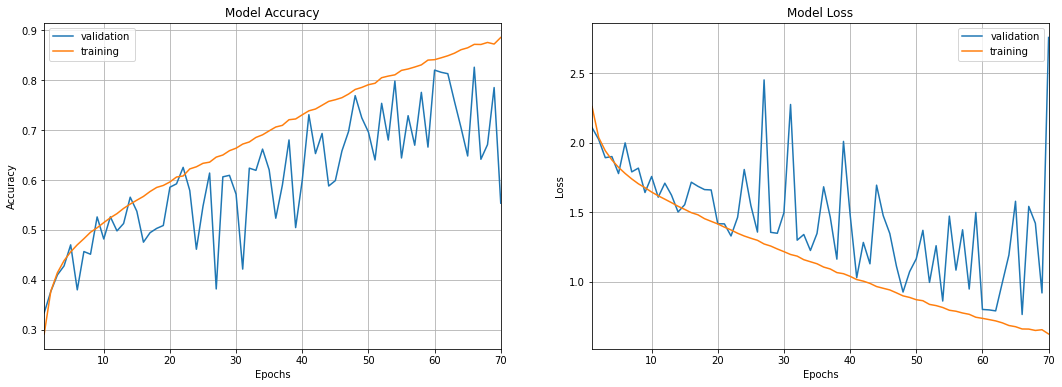

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 